# Visualization of "Landeserzeugung"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('cleaned_dataset.csv')
df

In [ ]:
# List of columns to calculate monthly sums for
columns_to_process = [
    'Laufwerke', 'Speicherwerke', 'Total Hydraulisch', 'Kernkraftwerke', 
    'Thermisch', 'Windkraft', 'Photovoltaik', 'Total Erneuerbar'
]

# Group by month, sum the specified columns and round
df_monthly_sums = df[df['Datum'].dt.year == 2025].groupby(df['Datum'].dt.strftime('%m'))[columns_to_process].sum().round(1)

# Reset the index to make 'Monat' a column
df_monthly_sums = df_monthly_sums.reset_index()

# Rename the date column to 'Monat'
df_monthly_sums.rename(columns={'Datum': 'Monat'}, inplace=True)

# Display the resulting dataframe
df_monthly_sums

,Monat,Laufwerke,Speicherwerke,Total Hydraulisch,Kernkraftwerke,Thermisch,Windkraft,Photovoltaik,Total Erneuerbar
0,01,176.8,351.3,528.1,354.9,57.5,5.6,33.5,979.8
1,02,124.2,313.9,438.1,281.9,43.1,1.8,42.0,806.9
2,03,112.0,169.5,281.5,282.8,41.6,0.6,84.1,690.7
3,04,199.8,233.6,433.4,297.1,47.7,1.8,162.9,942.9
4,05,218.2,290.4,508.8,142.4,34.1,1.7,98.5,785.4
5,06,257.0,343.5,600.5,182.7,39.2,1.3,167.7,991.6
6,07,281.8,346.8,628.5,192.9,49.3,1.3,183.8,1055.7


In [ ]:
# Add a row with total sums for each column at the end
total_row = pd.DataFrame(df_monthly_sums[columns_to_process].sum()).T
total_row['Monat'] = 'Total'
df_monthly_sums = pd.concat([df_monthly_sums, total_row], ignore_index=True)
df_monthly_sums

,Monat,Laufwerke,Speicherwerke,Total Hydraulisch,Kernkraftwerke,Thermisch,Windkraft,Photovoltaik,Total Erneuerbar
0,01,176.8,351.3,528.1,354.9,57.5,5.6,33.5,979.8
1,02,124.2,313.9,438.1,281.9,43.1,1.8,42.0,806.9
2,03,112.0,169.5,281.5,282.8,41.6,0.6,84.1,690.7
3,04,199.8,233.6,433.4,297.1,47.7,1.8,162.9,942.9
4,05,218.2,290.4,508.8,142.4,34.1,1.7,98.5,785.4
5,06,257.0,343.5,600.5,182.7,39.2,1.3,167.7,991.6
6,07,281.8,346.8,628.5,192.9,49.3,1.3,183.8,1055.7
7,Total,1369.8,2049.0,3418.9,1734.7,312.5,14.1,772.5,6253.0


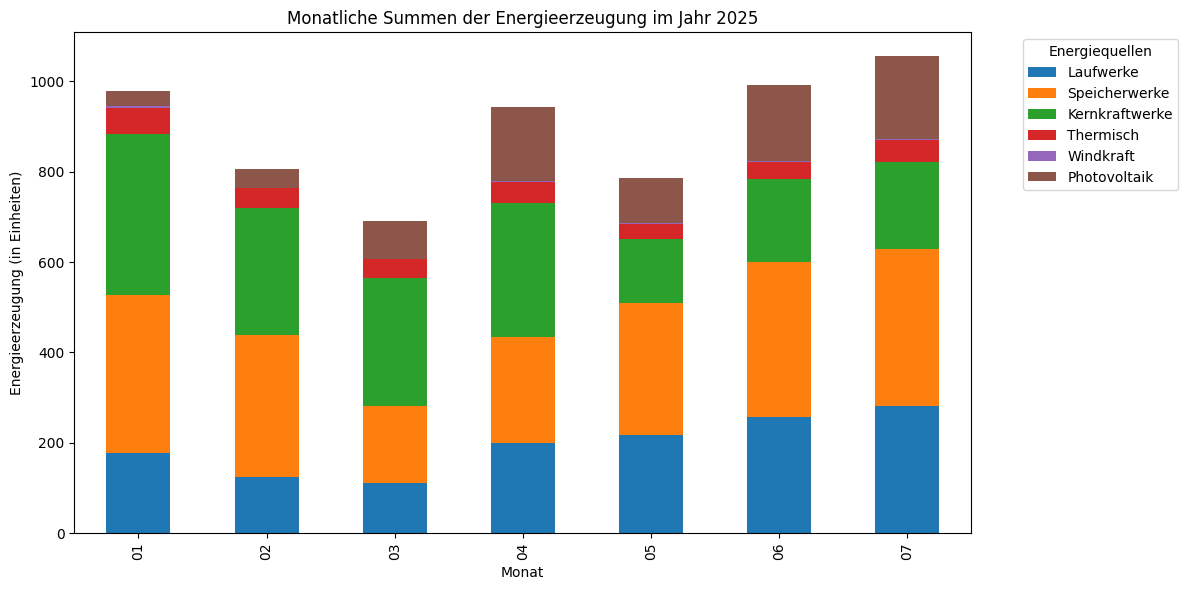

In [19]:
df_monthly_sums_copy = df_monthly_sums.copy()
df_monthly_sums_copy = df_monthly_sums_copy.drop(columns=['Total Hydraulisch', 'Total Erneuerbar'])
# visualize the monthly sums using a bar plot
plt.figure(figsize=(12, 6))
df_monthly_sums_plot = df_monthly_sums_copy[df_monthly_sums_copy['Monat'] != 'Total']
df_monthly_sums_plot.set_index('Monat').plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Monatliche Summen der Energieerzeugung im Jahr 2025')
plt.xlabel('Monat')
plt.ylabel('Energieerzeugung (in Einheiten)')
plt.legend(title='Energiequellen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

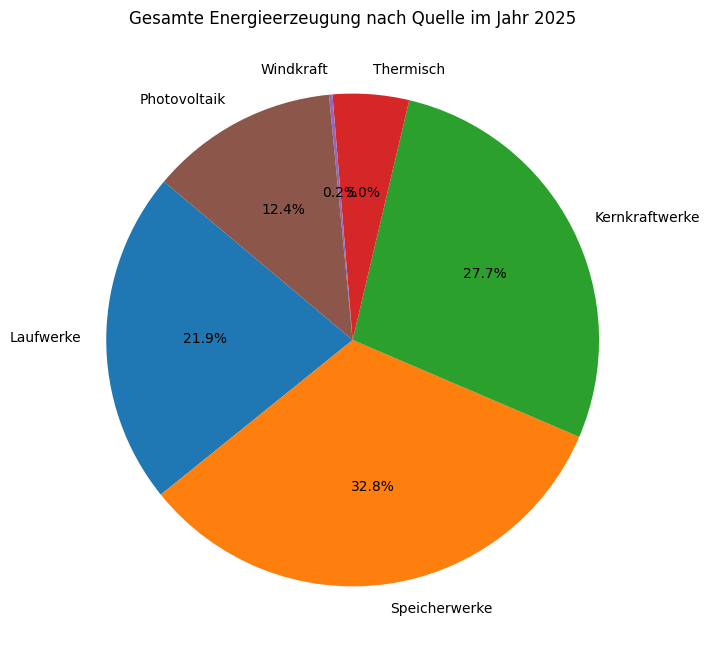

In [28]:
# create a pie chart for the total energy production by source in 2025 from df_monthly_sums_copy
df_total_2025 = df_monthly_sums_copy[df_monthly_sums_copy['Monat'] == 'Total']
energy_sources = ['Laufwerke', 'Speicherwerke', 'Kernkraftwerke', 'Thermisch', 'Windkraft', 'Photovoltaik']
energy_values = df_total_2025[energy_sources].values.flatten() 
plt.figure(figsize=(8, 8))
plt.pie(energy_values, labels=energy_sources, autopct='%1.1f%%', startangle=140)
plt.title('Gesamte Energieerzeugung nach Quelle im Jahr 2025')
plt.show()